# 中心軸の曲がりのモデル化

シルエットと中心軸を共に３次のベジエ曲線でもモデル化してみる。

In [1]:
from sympy import *
from sympy.abc import a,b,c
init_session()
import numpy as np
%matplotlib inline
from sympy import var

# 輪郭線データその１
points = np.array([[115, 75], [106, 85],[99, 95],[95, 105],[94, 115],[92, 125],[92, 135],[93, 145],
 [96, 155],[104, 165],[115, 175],[129, 185], [151, 195],[171, 205],[181, 215],[184, 225],
 [185, 235],[185, 245],[184, 255],[183, 265],[182, 275],[181, 285],[179, 295],[177, 305]])
'''
# 輪郭線データその２
points = np.array([[159, 76],[164, 86], [174, 96], [182, 106], [189, 116],
 [193, 126], [198, 136], [201, 146], [204, 156], [206, 166], [207, 176], [206, 186], [205, 196],
 [204, 206], [202, 216], [200, 226], [198, 236], [194, 246], [191, 256], [189, 266], [189, 276],
 [189, 286], [189, 296]])''';

IPython console for SymPy 1.2 (Python 3.6.6-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



# 三次ベジエ曲線の定義

In [2]:
px,py =var('px:4'),var('py:4') # px0,px1,px2,px3,py1,py0,py1,py2,py3
P = [Matrix([px[i],py[i]]) for i in [0,1,2,3]]
t = symbols("t")
bez3 = (1-t)**3*P[0] + 3*(1-t)**2*t*P[1] + 3*(1-t)*t**2*P[2] + t**3*P[3]
simplify(bez3)

⎡             3                  2          2                3⎤
⎢- px₀⋅(t - 1)  + 3⋅px₁⋅t⋅(t - 1)  - 3⋅px₂⋅t ⋅(t - 1) + px₃⋅t ⎥
⎢                                                             ⎥
⎢             3                  2          2                3⎥
⎣- py₀⋅(t - 1)  + 3⋅py₁⋅t⋅(t - 1)  - 3⋅py₂⋅t ⋅(t - 1) + py₃⋅t ⎦

# 直線軸、軸対象な理想的な大根のモデル

- 軸をY軸とする。
- 両側はY軸に線対象なベジエ曲線で近似できると仮定する。

左側のシルエットを表すベジエ曲線が

$$ x = f(y)  $$

であるなら、右側は

$$ x = -f(y) $$

である。

いま、中心軸は直線と仮定しているので、ベジエ曲線で近似する必要はないわけだが、曲線の特別な場合であると考え、あえてベジエ曲線で表現しておく。

直線を２次以上のベジエ曲線で近似する場合、両端以外の制御点は両端を結ぶ線分上にあれば位置は任意になってしまう。

また、一般には二つのベジエ曲線のパラメータは別物であり、同一視することはできない。例えば、同じY座標となるパラメータは一般には一致しない。しかし、上述のとおり、直線を近似する場合の制御点は任意であるので、制御点のY座標を両側のそれと一致させてやれば、どのパラメータ値においても中心軸のY座標と両側のY座標は一致する。

左右のベジエ曲線はY軸対称であると仮定しているので、同じパラメータの時のY座標は当然一致する。

## 確認のための例

In [3]:
asmp = [[0,0],[0.1,0.3],[0.1,0.4],[0.08,1]] # 右側のベジエ 関数の制御点
asmc = [[0,0],[0,0.3],[0,0.4],[0,1]] # 中心軸のベジエ 関数の制御点
# ベジエ 曲線の式に４点を代入した式を求める
bezAS1 = bez3.subs([(px[0],asmp[0][0]),(px[1],asmp[1][0]),(px[2],asmp[2][0]),(px[3],asmp[3][0])])
bezAS1 = bezAS1.subs([(py[0],asmp[0][1]),(py[1],asmp[1][1]),(py[2],asmp[2][1]),(py[3],asmp[3][1])])
bezASC = bez3.subs([(px[0],asmc[0][0]),(px[1],asmc[1][0]),(px[2],asmc[2][0]),(px[3],asmc[3][0])])
bezASC = bezASC.subs([(py[0],asmc[0][1]),(py[1],asmc[1][1]),(py[2],asmc[2][1]),(py[3],asmc[3][1])])

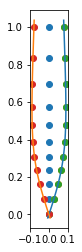

In [4]:
# 描画してみる
tplins = np.linspace(-0.02, 1.02,50)
tslins11 = np.linspace(-0, 1,11)
plt.gca().set_aspect('equal', adjustable='box')
plotx = np.array([bezAS1[0].subs(t,tp) for tp in tplins ])
ploty = np.array([bezAS1[1].subs(t,tp) for tp in tplins ])
plot11x = np.array([bezAS1[0].subs(t,tp) for tp in tslins11 ])
plot11y = np.array([bezAS1[1].subs(t,tp) for tp in tslins11 ])
plotx2 = -plotx
ploty2 = ploty
plotcx = np.array([bezASC[0].subs(t,tp) for tp in tslins11 ])
plotcy = np.array([bezASC[1].subs(t,tp) for tp in tslins11 ])
plt.scatter(plotcx,plotcy)
plt.scatter(plot11x,plot11y)
plt.scatter(plot11x,plotcy)
plt.scatter(-plot11x,plot11y)
plt.plot(plotx,ploty)
plt.plot(plotx2,ploty2)

# 曲がりのモデル

## 仮定
- 中心軸が直線であるときの輪郭線が三次のベジエ曲線 bez3(t) で表されており、同じパラメータを用いて両側のベジエ曲線が定義されている。
- 曲がり形状は、曲がりのない形状を特徴づける３つのベジエ曲線を定義する制御点を次のように変換して得られるベジエ曲線であると仮定する。
1. 両端の制御点 P0, P3 は変化しない。
2. 曲がり形状を近似する曲線の制御点 P1 は、元のP1をP0 を中心として回転した位置にある。P0-P1 の距離は変化しない。
3. 同様に、P2 は P3 を中心に回転した位置にあり、P2-P3 の距離は変化しない。
4. 両側と中心軸の制御点の回転量はすべて一致する。

下部のみに曲がりが見られるということは十分ありえるので、P0-P1 の回転角と P2-P3 の回転角はそれぞれ別とすべきであろう。

もっと自由度を上げてモデル化することはいくらでもできるが、いくらでも最もらしい当てはめが出来てしまうだろう。

目的は限りなく精度の高いフィッティングにあるのではなく、少ないパラメータで形状を表現することにある。おそらくこれくらいに制約を強くしても十分であろう。中心軸は２次のベジエで近似しても良いくらいだと思うが、そうするとパラメータ空間を一致させることができないので３次で近似することにする。

# 変形した形状の例

仮定したモデルを適用してどのような変形形状ができるか試しに描いてみよう。

In [5]:
# (a,b)周りに r ラジアン回転
def rotation(r,P,center=(0,0)): 
    cx,cy = center
    A1=Matrix(([1,0,-cx], [0,1,-cy],[0,0,1]))  #  center が原点になるように平行移動
    A2=Matrix(([cos(r),-sin(r),0], [sin(r),cos(r),0],[0,0,1])) # 原点周りに r ラジアン回転
    A3=Matrix(([1,0,cx], [0,1,cy],[0,0,1])) # 平行移動させた分だけ戻す
    A4=A3*A2*A1
    return (A4*Matrix([P[0],P[1],1]))[:2]

In [6]:
# テスト　　　　点(2,0) を　(1,0)を中心に　６０度回転させた時の座標を求める
rotation(pi/3,[2,0],center=(1,0))

正しいようである。

# 変形後の制御点を求める

制御点 P0,P1,P2,P3 をもとにして、P1 がP0を中心に r1 ラジアン、P2がP3を中心に r2 ラジアン回転したあとの 制御点を、 [Q0,Q1,Q2,Q3] とする。

In [7]:
r1,r2 = symbols('r1,r2')
Q = [P[0],rotation(r1,P[1],P[0]),rotation(r2,P[2],P[3]),P[3]]
Q

⎡⎡px₀⎤                                                                        
⎢⎢   ⎥, [-px₀⋅cos(r₁) + px₀ + px₁⋅cos(r₁) + py₀⋅sin(r₁) - py₁⋅sin(r₁), -px₀⋅si
⎣⎣py₀⎦                                                                        

                                                                              
n(r₁) + px₁⋅sin(r₁) - py₀⋅cos(r₁) + py₀ + py₁⋅cos(r₁)], [px₂⋅cos(r₂) - px₃⋅cos
                                                                              

                                                                              
(r₂) + px₃ - py₂⋅sin(r₂) + py₃⋅sin(r₂), px₂⋅sin(r₂) - px₃⋅sin(r₂) + py₂⋅cos(r₂
                                                                              

                        ⎡px₃⎤⎤
) - py₃⋅cos(r₂) + py₃], ⎢   ⎥⎥
                        ⎣py₃⎦⎦

# Q によって定義されるベジエ 曲線の式を求める

In [8]:
bez3Q = bez3.subs([(px[0],Q[0][0]),(px[1],Q[1][0]),(px[2],Q[2][0]),(px[3],Q[3][0])])
bez3Q = bez3Q.subs([(py[0],Q[0][1]),(py[1],Q[1][1]),(py[2],Q[2][1]),(py[3],Q[3][1])])

In [9]:
simplify(bez3Q)

⎡                             2                                               
⎢             3        3   3⋅t ⋅(t - 1)⋅(2⋅px₂⋅cos(r₂) + px₂⋅cos(2⋅r₂) - px₂ -
⎢- px₀⋅(t - 1)  + px₃⋅t  - ───────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                            3        3      2
⎣                                               - py₀⋅(t - 1)  + py₃⋅t  - 3⋅t 

                                                                              
 2⋅px₃⋅cos(r₂) - px₃⋅cos(2⋅r₂) + 3⋅px₃ - py₂⋅sin(2⋅r₂) + py₃⋅sin(2⋅r₂))   3⋅t⋅
─────────────────────────────────────────────────────────────────────── - ────
         2                                                                    
                                                                              
                                                   

# 具体例

In [151]:
def drawModel(asml,asmc,asmr,angle1=0,angle2=0):
    # bezASL 左側面のベジエ 曲線　 
    bezASL = bez3Q.subs([(px[0],asml[0][0]),(px[1],asml[1][0]),(px[2],asml[2][0]),(px[3],asml[3][0])])
    bezASL = bezASL.subs([(py[0],asml[0][1]),(py[1],asml[1][1]),(py[2],asml[2][1]),(py[3],asml[3][1])])
    bezASL = bezASL.subs([(r1,angle1),(r2,angle2)])
    # bezASC 中心軸のベジエ 曲線　
    bezASC = bez3Q.subs([(px[0],asmc[0][0]),(px[1],asmc[1][0]),(px[2],asmc[2][0]),(px[3],asmc[3][0])])
    bezASC = bezASC.subs([(py[0],asmc[0][1]),(py[1],asmc[1][1]),(py[2],asmc[2][1]),(py[3],asmc[3][1])])
    bezASC = bezASC.subs([(r1,angle1),(r2,angle2)])
    # bezASR 中心軸のベジエ 曲線　 
    bezASR = bez3Q.subs([(px[0],asmr[0][0]),(px[1],asmr[1][0]),(px[2],asmr[2][0]),(px[3],asmr[3][0])])
    bezASR = bezASR.subs([(py[0],asmr[0][1]),(py[1],asmr[1][1]),(py[2],asmr[2][1]),(py[3],asmr[3][1])])
    bezASR = bezASR.subs([(r1,angle1),(r2,angle2)])
    
    tplins = np.linspace(-0.02, 1.02,50)
    tslins11 = np.linspace(-0, 1,11)
    plt.gca().set_aspect('equal', adjustable='box')
    for bezline in [bezASL,bezASC,bezASR]:
        plotx = np.array([bezline[0].subs(t,tp) for tp in tplins ])
        ploty = np.array([bezline[1].subs(t,tp) for tp in tplins ])
        plot11x = np.array([bezline[0].subs(t,tp) for tp in tslins11 ])
        plot11y = np.array([bezline[1].subs(t,tp) for tp in tslins11 ])
        plt.scatter(plot11x,plot11y)
        plt.plot(plotx,ploty)

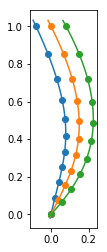

In [152]:
asml = [[0,0],[-0.1,0.3],[-0.1,0.4],[-0.08,1]] # 左側シルエットを近似するための制御点
asmc = [[0,0],[0,0.3],[0,0.4],[0,1]] # 中心軸を近似するための制御点　
asmr = [[0,0],[0.1,0.3],[0.1,0.4],[0.08,1]] # 右側シルエットを近似するための制御点

# 下 (angle1) を -30度、上(angle2）を３０度曲げる
drawModel(asml,asmc,asmr,angle1=-pi/6,angle2=pi/6)

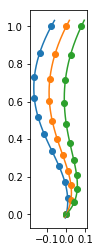

In [12]:
# 下 (angle1) を -30度、上(angle2）も-３０度曲げる
drawModel(asml,asmc,asmr,angle1=-pi/6,angle2=-pi/6)

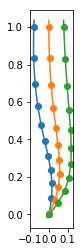

In [13]:
# 下 (angle1) だけ -30度曲げる
drawModel(asml,asmc,asmr,angle1=-pi/6,angle2=0)

# 考察


上端が水平なのはちょっと不自然な気がする。
P1が P0 を中心にr1 ラジアン回転するのではなく、P0P1が中心軸上端を中心に r1 ラジアン回転すると考えてみるはどうだろう。


In [46]:
cx,cy = symbols('cx,cy')
Q2 = [P[0],rotation(r1,P[1],P[0]),rotation(r2,P[2],(cx,cy)),rotation(r2,P[3],(cx,cy))]
Q2

⎡⎡px₀⎤                                                                        
⎢⎢   ⎥, [-px₀⋅cos(r₁) + px₀ + px₁⋅cos(r₁) + py₀⋅sin(r₁) - py₁⋅sin(r₁), -px₀⋅si
⎣⎣py₀⎦                                                                        

                                                                              
n(r₁) + px₁⋅sin(r₁) - py₀⋅cos(r₁) + py₀ + py₁⋅cos(r₁)], [-cx⋅cos(r₂) + cx + cy
                                                                              

                                                                              
⋅sin(r₂) + px₂⋅cos(r₂) - py₂⋅sin(r₂), -cx⋅sin(r₂) - cy⋅cos(r₂) + cy + px₂⋅sin(
                                                                              

                                                                              
r₂) + py₂⋅cos(r₂)], [-cx⋅cos(r₂) + cx + cy⋅sin(r₂) + px₃⋅cos(r₂) - py₃⋅sin(r₂)
                                                                              

                                                

In [47]:
bez3Q2 = bez3.subs([(px[0],Q2[0][0]),(px[1],Q2[1][0]),(px[2],Q2[2][0]),(px[3],Q[3][0])])
bez3Q2 = bez3Q2.subs([(py[0],Q2[0][1]),(py[1],Q2[1][1]),(py[2],Q2[2][1]),(py[3],Q2[3][1])])
simplify(bez3Q2)

⎡                             2                                               
⎢             3        3   3⋅t ⋅(t - 1)⋅(2⋅cx⋅cos(r₂) + cx⋅cos(2⋅r₂) - 3⋅cx - 
⎢- px₀⋅(t - 1)  + px₃⋅t  + ───────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                               3    3                                        
⎣                  - py₀⋅(t - 1)  + t ⋅(-cx⋅sin(r₂) - cy⋅cos(r₂) + cy + px₃⋅si

                                                                              
cy⋅sin(2⋅r₂) - 2⋅px₂⋅cos(r₂) - px₂⋅cos(2⋅r₂) + px₂ + py₂⋅sin(2⋅r₂))   3⋅t⋅(t -
─────────────────────────────────────────────────────────────────── - ────────
       2                                                                      
                                                                              
                          2                        

In [149]:
def drawModel2(asml,asmc,angle1=0,angle2=0):
    # bezASC 中心軸のベジエ 曲線　
    bezASC = bez3Q2.subs([(px[0],asmc[0][0]),(px[1],asmc[1][0]),(px[2],asmc[2][0]),(px[3],asmc[3][0])])
    bezASC = bezASC.subs([(py[0],asmc[0][1]),(py[1],asmc[1][1]),(py[2],asmc[2][1]),(py[3],asmc[3][1])])
    bezASC = bezASC.subs([(r1,angle1),(r2,angle2),(cx,asmc[3][0]),(cy,asmc[3][1])])
    # bezASL 左側面のベジエ 曲線　 
    bezASL = bez3Q2.subs([(px[0],asml[0][0]),(px[1],asml[1][0]),(px[2],asml[2][0]),(px[3],asml[3][0])])
    bezASL = bezASL.subs([(py[0],asml[0][1]),(py[1],asml[1][1]),(py[2],asml[2][1]),(py[3],asml[3][1])])
    bezASL = bezASL.subs([(r1,angle1),(r2,angle2),(cx,asmc[3][0]),(cy,asmc[3][1])])
    # bezASR 中心軸のベジエ 曲線　 
    bezASR = bez3Q2.subs([(px[0],-asml[0][0]),(px[1],-asml[1][0]),(px[2],-asml[2][0]),(px[3],-asml[3][0])])
    bezASR = bezASR.subs([(py[0],asml[0][1]),(py[1],asml[1][1]),(py[2],asml[2][1]),(py[3],asml[3][1])])
    bezASR = bezASR.subs([(r1,angle1),(r2,angle2),(cx,asmc[3][0]),(cy,asmc[3][1])])
    
    tplins = np.linspace(-0.02, 1.02,50)
    tslins11 = np.linspace(-0, 1,11)
    plt.gca().set_aspect('equal', adjustable='box')
    for bezline in [bezASL,bezASC,bezASR]:
        plotx = np.array([bezline[0].subs(t,tp) for tp in tplins ])
        ploty = np.array([bezline[1].subs(t,tp) for tp in tplins ])
        plot11x = np.array([bezline[0].subs(t,tp) for tp in tslins11 ])
        plot11y = np.array([bezline[1].subs(t,tp) for tp in tslins11 ])
        plt.scatter(plot11x,plot11y)
        plt.plot(plotx,ploty)

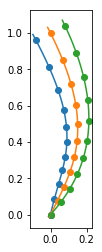

In [150]:
asml = [[0,0],[-0.1,0.3],[-0.1,0.4],[-0.08,1]] # 左側シルエットを近似するための制御点
asmc = [[0,0],[0,0.3],[0,0.4],[0,1]] # 中心軸を近似するための制御点　

# 下 (angle1) を -30度、上(angle2）を３０度曲げる
drawModel2(asml,asmc,angle1=-pi/6,angle2=pi/6)

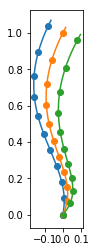

In [69]:
# 下 (angle1) を -30度、上(angle2）も-３０度曲げる
drawModel2(asml,asmc,angle1=-pi/6,angle2=-pi/6)

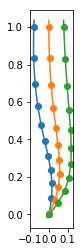

In [70]:
# 下 (angle1) だけ -30度曲げる
drawModel2(asml,asmc,angle1=-pi/6,angle2=0)

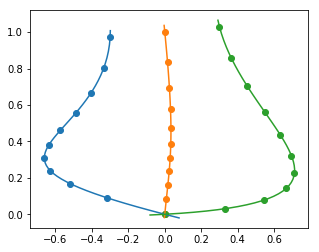

In [99]:
asml = [[0,0],[-1.3,0.2],[-0.4,0.4],[-0.3,1]] # 左側シルエットを近似するための制御点
asmc = [[0,0],[0,0.3],[0,0.4],[0,1]] # 中心軸を近似するための制御点　
drawModel2(asml,asmc,angle1=-pi/32,angle2=pi/32)

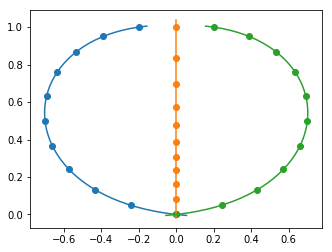

In [113]:
asml = [[0,0],[-0.9,0.1],[-0.9,0.9],[-0.2,1]] # 左側シルエットを近似するための制御点
asmc = [[0,0],[0,0.3],[0,0.4],[0,1]] # 中心軸を近似するための制御点　
drawModel2(asml,asmc,angle1=0,angle2=0)

# 考察

描いてみた限りでは良さげな気がする。

ただ、描くのは簡単であるが、最適当てはめができるかどうかが問題。

曲がりがなければベジエ曲線の当てはめは４元連立一次方程式に過ぎないが、曲がりを考慮すると角度が未知数として２つ増える上に三角関数と制御点の積の項が出てきてしまい解析的に解けないだろうと思われる。

In [126]:
def modellines(asml,asmc,angle1=0,angle2=0,t_start=0.0,t_end=1.0,npoints=16,showImage=False):
    # bezASL 左側面のベジエ 曲線　 
    bezASL = bez3Q2.subs([(px[0],asml[0][0]),(px[1],asml[1][0]),(px[2],asml[2][0]),(px[3],asml[3][0])])
    bezASL = bezASL.subs([(py[0],asml[0][1]),(py[1],asml[1][1]),(py[2],asml[2][1]),(py[3],asml[3][1])])
    bezASL = bezASL.subs([(r1,angle1),(r2,angle2),(cx,asmc[3][0]),(cy,asmc[3][1])])
    # bezASC 中心軸のベジエ 曲線　
    # bezASC = bez3Q.subs([(px[0],asmc[0][0]),(px[1],asmc[1][0]),(px[2],asmc[2][0]),(px[3],asmc[3][0])])
    # bezASC = bezASC.subs([(py[0],asmc[0][1]),(py[1],asmc[1][1]),(py[2],asmc[2][1]),(py[3],asmc[3][1])])
    # bezASC = bezASC.subs([(r1,angle1),(r2,angle2)])
    # bezASR 中心軸のベジエ 曲線　 
    bezASR = bez3Q2.subs([(px[0],-asml[0][0]),(px[1],-asml[1][0]),(px[2],-asml[2][0]),(px[3],-asml[3][0])])
    bezASR = bezASR.subs([(py[0],asml[0][1]),(py[1],asml[1][1]),(py[2],asml[2][1]),(py[3],asml[3][1])])
    bezASR = bezASR.subs([(r1,angle1),(r2,angle2),(cx,asmc[3][0]),(cy,asmc[3][1])])
    
    tplins = np.linspace(t_start, t_end,npoints)
    llist = [bezASL.subs(t,tp) for tp in tplins]
    rlist = [bezASR.subs(t,tp) for tp in tplins]
    
    if showImage:
        plt.gca().set_aspect('equal', adjustable='box')
        plt.scatter([x for [x,y] in llist],[y for [x,y] in llist])
        plt.scatter([x for [x,y] in rlist],[y for [x,y] in llist])        
    return llist,rlist

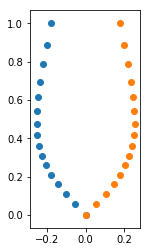

In [130]:
asml = [[0,0],[-0.3,0.3],[-0.3,0.4],[-0.18,1]] # 左側シルエットを近似するための制御点
asmc = [[0,0],[0,0.3],[0,0.4],[0,1]] # 中心軸を近似するための制御点　
ll,rl = modellines(asml,asmc,angle1=0,angle2=0,t_start=0.0,t_end=1.0,npoints=16,showImage=True);

In [ ]:
# 　モデル定義の簡単化
- 変形前の基準となる中心軸はY軸に一致させるように置かれているものとする。変形前のX座標は０である。
- 仮定により中心軸の制御点のY座標は輪郭の制御点のY座標に等しいのであるから指定の必要はない。

In [147]:
def drawModel3(asml,angle1,angle2):
    asmc = [[0,0],[0,asml[1][1]],[0,asml[2][1]],[0,1]]
    # bezASC 中心軸のベジエ 曲線　
    bezASC = bez3Q2.subs([(px[0],asmc[0][0]),(px[1],asmc[1][0]),(px[2],asmc[2][0]),(px[3],asmc[3][0])])
    bezASC = bezASC.subs([(py[0],asmc[0][1]),(py[1],asmc[1][1]),(py[2],asmc[2][1]),(py[3],asmc[3][1])])
    bezASC = bezASC.subs([(r1,angle1),(r2,angle2),(cx,asmc[3][0]),(cy,asmc[3][1])])
    # bezASL 左側面のベジエ 曲線　 
    bezASL = bez3Q2.subs([(px[0],asml[0][0]),(px[1],asml[1][0]),(px[2],asml[2][0]),(px[3],asml[3][0])])
    bezASL = bezASL.subs([(py[0],asml[0][1]),(py[1],asml[1][1]),(py[2],asml[2][1]),(py[3],asml[3][1])])
    bezASL = bezASL.subs([(r1,angle1),(r2,angle2),(cx,asmc[3][0]),(cy,asmc[3][1])])
    # bezASR 中心軸のベジエ 曲線　 
    bezASR = bez3Q2.subs([(px[0],-asml[0][0]),(px[1],-asml[1][0]),(px[2],-asml[2][0]),(px[3],-asml[3][0])])
    bezASR = bezASR.subs([(py[0],asml[0][1]),(py[1],asml[1][1]),(py[2],asml[2][1]),(py[3],asml[3][1])])
    bezASR = bezASR.subs([(r1,angle1),(r2,angle2),(cx,asmc[3][0]),(cy,asmc[3][1])])
    
    tplins = np.linspace(-0.02, 1.02,50)
    tslins11 = np.linspace(-0, 1,11)
    plt.gca().set_aspect('equal', adjustable='box')
    
    for bezline in [bezASL,bezASC,bezASR]:
        plotx = np.array([bezline[0].subs(t,tp) for tp in tplins ])
        ploty = np.array([bezline[1].subs(t,tp) for tp in tplins ])
        plot11x = np.array([bezline[0].subs(t,tp) for tp in tslins11 ])
        plot11y = np.array([bezline[1].subs(t,tp) for tp in tslins11 ])
        plt.scatter(plot11x,plot11y)
        plt.plot(plotx,ploty)

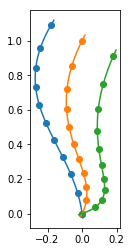

In [148]:
# 下 (angle1) だけ -30度曲げる
drawModel3(asml,angle1=-pi/6,angle2=-pi/6)